# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: DANAC, Nathan Gabriel C.\
_Student No._: 2021 - 12517\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Nathan Gabriel C. Danac**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


Importing the necessary modules and functions,

In [ ]:
import numpy as np
from math import sin
from cmath import exp, pi
import matplotlib.pyplot as plt

A Fourier series is a representation of some function $f$ using sines and cosines.
$$f(x) =\sum_{k=0}^\infty\alpha_k\cos\left(\frac{2\pi kx}{L}\right) + \sum_{k=1}^\infty\beta_k\sin\left(\frac{2\pi kx}{L}\right) = \sum_{k=-\infty}^\infty\gamma_k\exp\left(i\frac{2\pi kx}{L}\right)$$
To obtain the Fourier coefficients $\gamma_k$, we can use an integral
$$\gamma_k = \frac{1}{L}\int_0^Lf(x)\exp\left(i\frac{2\pi kx}{L}\right)\ dx$$
Rewriting $f(x)$,
\begin{equation}
  f(x) = y_n = \begin{bmatrix}
           y_0 &
           y_1 &
           \cdots &
           y_N
         \end{bmatrix}
\end{equation}
Creating this row vector `y`, with $N = 1000$

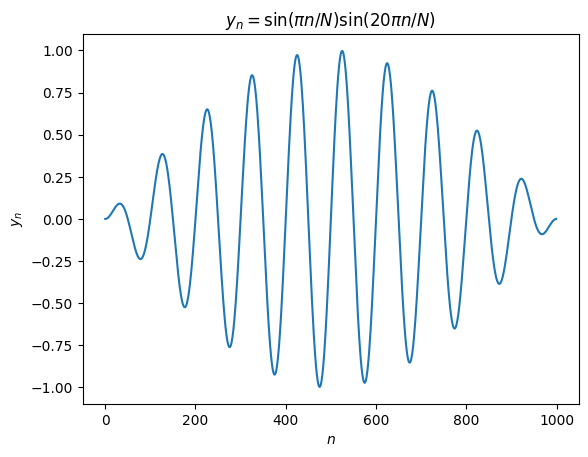

In [ ]:
N = 1000

y = np.zeros(N)

for n in range(N):
  y[n] = sin(pi*n/N)*sin(20*pi*n/N)

plt.plot(y)
plt.xlabel("$n$")
plt.ylabel("$y_n$")
plt.title("$y_n = \sin(\pi n/N)\sin(20\pi n/N)$")
plt.show()

Substituting and approximating the integral using the trapezoidal method,
$$\gamma_k = \frac{1}{N}\sum_{n=0}^{N-1}y_n\exp\left(i\frac{2\pi kn}{N}\right)$$
We can obtain the standard quantity of the Fourier coefficients $c_k$,
$$c_k = \sum_{n=0}^{N-1}y_n\exp\left(i\frac{2\pi kn}{N}\right)$$
We can evaluate this summation using a series of `for` loops,

In [ ]:
def dft(y):
  c = np.zeros(N//2+1, complex)

  for k in range(N//2+1):
    for n in range(N):
      c[k] += y[n] * exp(-2j*pi*k*n/N)

  return c

ck = dft(y)

We have now obtained the Fourier coefficients, which we can plot using `pyplot`

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


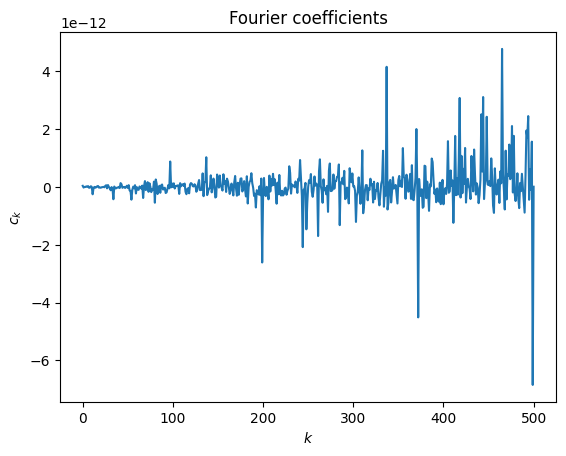

In [ ]:
plt.plot(ck)
plt.ylabel("$c_k$")
plt.xlabel("$k$")
plt.title("Fourier coefficients")
plt.show()

Since we are interested only in the ampltiude of the Fourier coefficients, we can plot their absolute value instead.

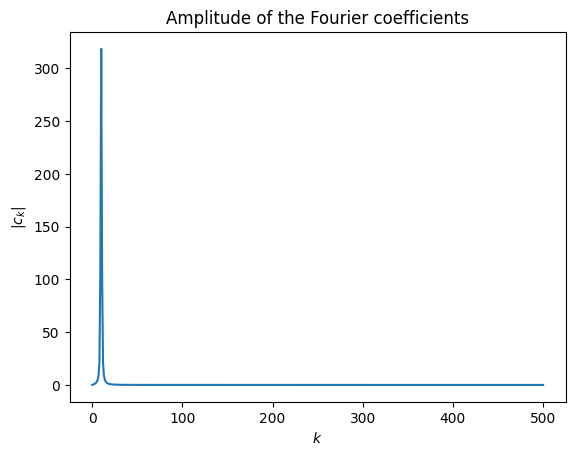

In [ ]:
plt.plot(abs(ck))
plt.ylabel("$|c_k|$")
plt.xlabel("$k$")
plt.title("Amplitude of the Fourier coefficients")
plt.show()

We can observe a peak, which we can zoom in on.

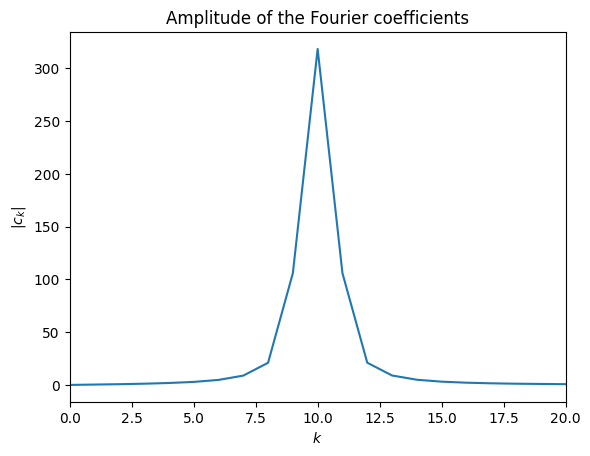

In [ ]:
plt.plot(abs(ck))
plt.ylabel("$|c_k|$")
plt.xlabel("$k$")
plt.title("Amplitude of the Fourier coefficients")
plt.xlim(0, 20)
plt.show()

This method works. However, we were only able to obtain the first half of the Fourier coefficients. Additionally, the use of double `for` loops was computationally expensive, with $O(N^2)$.

Returning to our equation for the Fourier coefficients,
$$c_k = \sum_{n=0}^{N-1}y_n\exp\left(i\frac{2\pi kn}{N}\right)$$
This is equivalent to the product of matrices,
\begin{equation}
  \begin{bmatrix}
    c_0 \\
    c_1 \\
    \vdots \\
    c_{N - 1}
  \end{bmatrix} = \begin{bmatrix}
           1 & 1 & 1 & \cdots & 1\\
           1 & \omega & \omega^2 & \cdots & \omega^{N-1} \\
           1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
           \vdots & \vdots & \vdots & \ddots & \vdots \\
           1 & \omega^{N - 1} & \omega^{2(N - 1)} & \cdots & \omega^{(N-1)^2}
         \end{bmatrix}\begin{bmatrix}
           y_0 \\
           y_1 \\
           \vdots \\
           y_{N - 1}
         \end{bmatrix}
\end{equation}
where $\omega = e^{-2\pi i/N}$

To translate this matrix product into Python, let us begin by a row vector for $n$ and a column vector for $k$, each going from $0$ to $N - 1$.

\begin{equation}
  n = \begin{bmatrix}
           0 &
           1 &
           \cdots &
           N - 1
         \end{bmatrix}
\end{equation}

\begin{equation}
  k = \begin{bmatrix}
           0 \\
           1 \\
           \vdots \\
           N - 1
         \end{bmatrix}
\end{equation}

Taking the matrix product,

\begin{equation}
  n*k = \begin{bmatrix}
           0 &
           1 &
           \cdots &
           N - 1
         \end{bmatrix}
         \begin{bmatrix}
           0 \\
           1 \\
           \vdots \\
           N - 1
         \end{bmatrix}
         = \begin{bmatrix}
           0 & 0 & 0 & \cdots & 0\\
           0 & 1 & 2 & \cdots & N-1 \\
           0 & 2 & 4 & \cdots & 2(N-1) \\
           \vdots & \vdots & \vdots & \ddots & \vdots \\
           0 & N - 1 & 2(N - 1) & \cdots & (N-1)^2
         \end{bmatrix}
\end{equation}

Using Python, we just need to apply matrix as a power of $\omega$ to obtain the DFM matrix,

\begin{equation}
  \omega^{n*k} = \begin{bmatrix}
           1 & 1 & 1 & \cdots & 1\\
           1 & \omega & \omega^2 & \cdots & \omega^{N-1} \\
           1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
           \vdots & \vdots & \vdots & \ddots & \vdots \\
           1 & \omega^{N - 1} & \omega^{2(N - 1)} & \cdots & \omega^{(N-1)^2}
         \end{bmatrix}
\end{equation}

Since we already have the matrix for $y_n$, we can now obtain the Fourier coefficients $c_k$

In [ ]:
def dft2(y):
  omega = np.exp(-2j * np.pi/N)
  n = np.arange(N)
  k = n.reshape((N, 1))
  dftm = omega**(n * k)

  c = np.dot(dftm, y)

  return c

ck2 = dft2(y)

Plotting again,

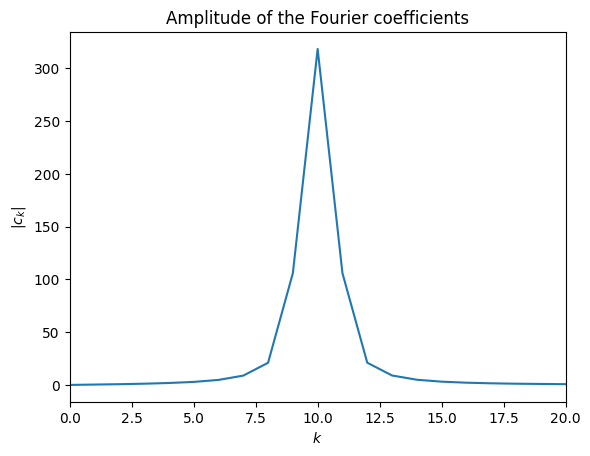

In [ ]:
plt.plot(abs(ck2))
plt.ylabel("$|c_k|$")
plt.xlabel("$k$")
plt.title("Amplitude of the Fourier coefficients")
plt.xlim(0, 20)
plt.show()

The Fourier coefficients describe the amplitude and phase information of each signal that contributes to the entire Fourier series representation of the original function.

For our set of Fourier coefficients, we can see a peak at $k = 10$, suggesting that if we were to choose only one signal to represent our function, it would be best approximated by
$$f(x)\approx c_{10}\exp\left(-i\frac{20\pi x}{L}\right)$$
Hence, it is this signal and the coefficient $c_{10}$ that prominently shapes our Fourier series representation. We can also see a sharp decrease both to the left and to the right of $k = 10$. Hence, the closer $k$ is to 10, the better $c_k$ describes our function  $f(x)$.


### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive/

 1CF6C7D4-8572-477F-A9FC-011622283AAA.jpeg
 202112517.jpg
 368558347_1963812437309799_6475282470010724712_n.jpg
 406EF345-02D5-4C31-9918-38B9A941F362.jpeg
 63E62B20-2594-4300-9873-74CEC37ED2EF.jpeg
 92A266EA-248D-479F-9766-FB6AED86D6C0.jpeg
 AP155
'AY 2021-2022'
'AY 2022-2023'
 Books
 CA3D50A2-7F36-4C8B-B098-17565C15242A.jpeg
 Classroom
'Colab Notebooks'
'Copy of Physics_108_Academic_Integrity_Statement_2023.docx'
'Copy of Physics_108_Academic_Integrity_Statement_2023.gdoc'
'DANAC_1_Pendular behavior of public transport networks.pdf'
'DANAC_1_Rumor Propagation is Amplified by Echo Chambers in Social Media.pdf'
'DANAC_2_Pendular behavior of public transport networks.pdf'
'DANAC_2_Rumor Propagation is Amplified by.pdf'
'DANAC - 2x2.png'
'DANAC_3_Revealing time’s secrets at the National Theatre of Costa Rica via innovative software for cultural heritage research (1).pdf'
'DANAC_3_Revealing time’s secrets at the National Theatre of Costa Rica via innovative software for cultural heritage r

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

Plotting our data,

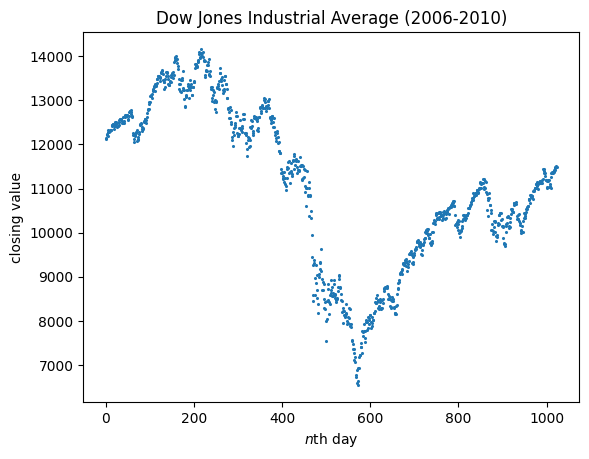

In [ ]:
plt.scatter(range(len(dow)), dow, marker=".", s=6)
plt.xlabel("$n$th day")
plt.ylabel("closing value")
plt.title("Dow Jones Industrial Average (2006-2010)")
plt.show()

We can use the built in `rfft` function from `numpy.fft` to obtain the Fourier coefficients from the function approximating this data. We can also plot the amplitude of these coefficients, as we did before.

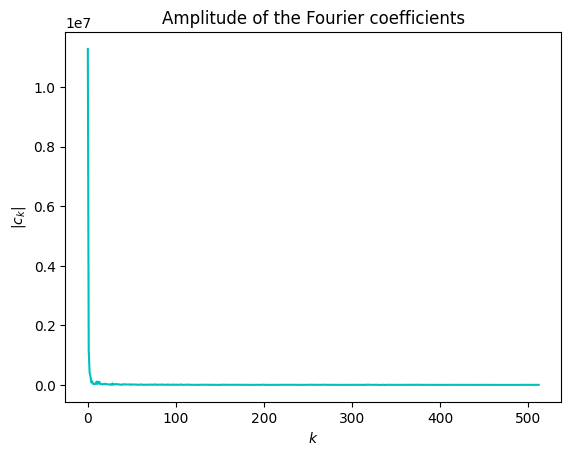

In [ ]:
ck = np.fft.rfft(dow)

plt.plot(abs(ck), c="c")
plt.ylabel("$|c_k|$")
plt.xlabel("$k$")
plt.title("Amplitude of the Fourier coefficients")
plt.show()

Keeping only the first 10% of these coefficients and setting the rest to zero, we can plot the original set of Fourier coefficients against the new one.

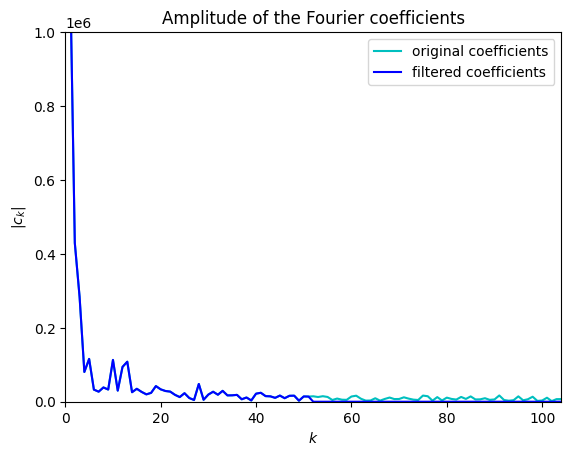

In [ ]:
L = len(ck)//10 + 1

ck2 = np.copy(ck)
ck2[L:] = 0

plt.plot(abs(ck), c="c", label="original coefficients")
plt.plot(abs(ck2), c="b", label="filtered coefficients")
plt.ylabel("$|c_k|$")
plt.xlabel("$k$")
plt.legend()
plt.xlim(0, 2*L)
plt.ylim(0, 1e6)
plt.title("Amplitude of the Fourier coefficients")
plt.show()

We can use the reverse Fourier transform `rfft` function from the same module to obtain our updated data set, and plot it against the original.

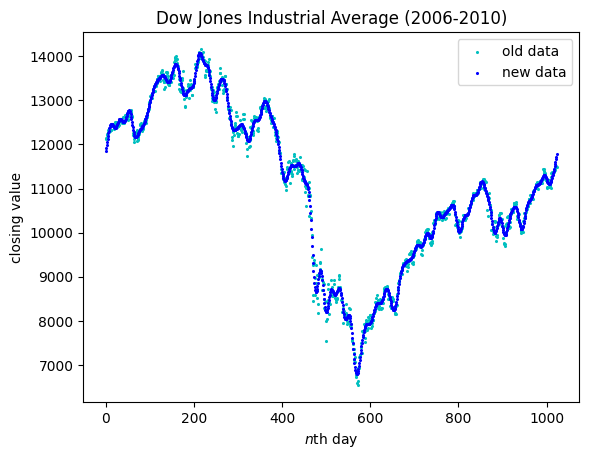

In [ ]:
dow2 = np.fft.irfft(ck2)

plt.scatter(range(len(dow)), dow, marker=".", s=6, c="c", label="old data")
plt.scatter(range(len(dow2)), dow2, marker=".", s=6, c="b", label="new data")
plt.xlabel("$n$th day")
plt.ylabel("closing value")
plt.legend()
plt.title("Dow Jones Industrial Average (2006-2010)")
plt.show()

We can observe the same trends between the old and new data. However, the new data appears smoother compared to the original.

We can explain these changes by returning to the original definition of the Fourier series,
$$f(x) =\sum_{k=0}^\infty\alpha_k\cos\left(\frac{2\pi kx}{L}\right) + \sum_{k=1}^\infty\beta_k\sin\left(\frac{2\pi kx}{L}\right)$$
The frequencies $v$ of both the series of sines and cosines are given by
$$v = \frac{L}{k} \propto \frac{1}{k}$$
Clearly, the frequency is inversely propotional to $k$.

Hence, by removing the Fourier coefficients with larger values of $k$, we are removing higher-frequency sines and cosines from our Fourier series representation. These functions gave the original data its spiky or jittery apperance. The remaining lower-frequency components in the new data then appears much smoother.